In [57]:
from Codigo import *
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix, lag_plot
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
sn.set(style="whitegrid")

In [58]:
pd.options.display.float_format = '{:,.4f}'.format

In [59]:
Datos = EleccionDatos('../../Alemania_Reducida.csv', 'Inversi')

['Inversiones de cartera, entrada neta de capital (balanza de pagos, US$ a precios actuales)', 'Inversiones de cartera, neta (balanza de pagos, US$ a precios actuales)', 'Inversión extranjera directa, salidas netas (BDP, USD a precios actuales)', 'Inversión en energía con participación privada (US$ a precios actuales)', 'Inversiones en agua y servicios sanitarios con participación privada (US$ a precios actuales)', 'Inversión neta en activos no financieros (% del PIB)', 'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)', 'Inversión neta en activos no financieros (UMN actual)', 'Inversión extranjera directa, salida neta de capital (% del PIB)', 'Inversión en transporte con participación privada (US$ a precios actuales)', 'Inversiones de cartera, bonos (PPG +PNG) (NFL, US$ a precios actuales)', 'Inversión extranjera directa, entrada neta de capital (% del PIB)', 'Inversión extranjera directa, neta (balanza de pagos, US$ a precios actuales)'

In [60]:
dt = Datos[['PIB (US$ a precios actuales)','Gasto de consumo final (US$ a precios actuales)','Gasto nacional bruto (UMN a precios actuales)']].dropna(axis = 0)
dt.info()
dt.columns = ['PIB','Consumo','Gasto']
dt = dt.reset_index()
dt['fecha'] = dt['2']
dt.drop('2', axis = 1, inplace= True)
dt['fecha'] = pd.to_datetime(dt['fecha'], format='%Y')
dt['fecha'] = dt['fecha'] + pd.DateOffset(days = 364)
dt.set_index('fecha', inplace= True)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   PIB (US$ a precios actuales)                     53 non-null     float64
 1   Gasto de consumo final (US$ a precios actuales)  53 non-null     float64
 2   Gasto nacional bruto (UMN a precios actuales)    53 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


In [61]:
dt.describe()

,PIB,Consumo,Gasto
count,53.0000,53.0000,53.0000
mean,"2,134,595,501,389.8152","1,589,111,718,746.1589","1,815,845,159,150.9434"
std,"1,279,412,956,715.5347","921,344,574,970.8710","879,363,796,566.8715"
min,"215,838,448,137.6584","155,151,901,886.3891","422,427,704,000.0000"
25%,"800,472,055,387.2782","646,945,276,503.6781","1,048,517,488,000.0000"
50%,"2,131,571,696,931.7471","1,603,824,671,258.6101","1,907,653,000,000.0000"
75%,"3,411,261,212,652.3413","2,521,046,002,002.7998","2,391,827,000,000.0000"
max,"4,259,934,911,821.6372","3,041,225,103,434.0601","3,787,522,000,000.0000"


In [62]:
for i in dt.columns:
    dt[i] = np.log(dt[i])


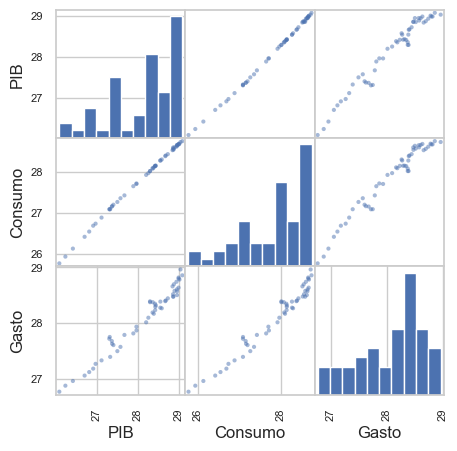

In [63]:
scatter_matrix(dt, figsize=(5,5))
plt.show()

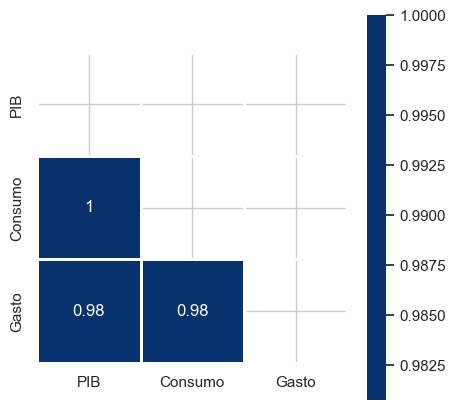

In [64]:
corr = dt.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize = (5,5))
sn.heatmap(corr, mask=mask, cmap ='Blues', vmax=1, center = 0, square= True, linewidths= 1, annot= True)
plt.show()

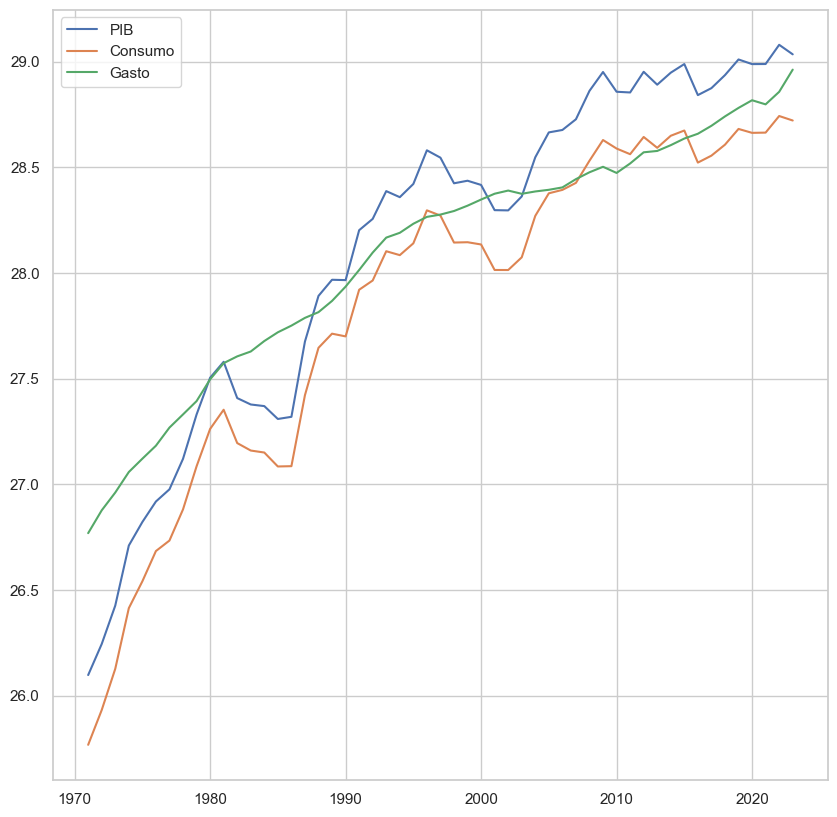

In [65]:

plt.plot(dt, label = dt.columns)
plt.legend()
plt.show()

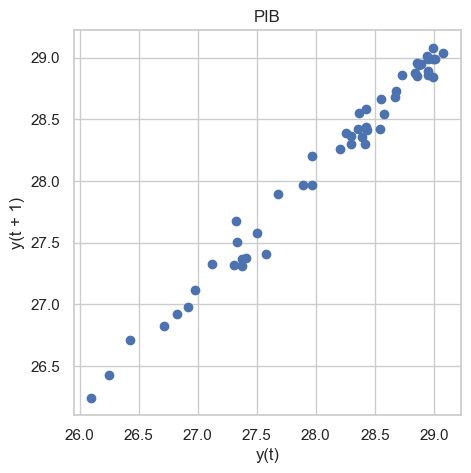

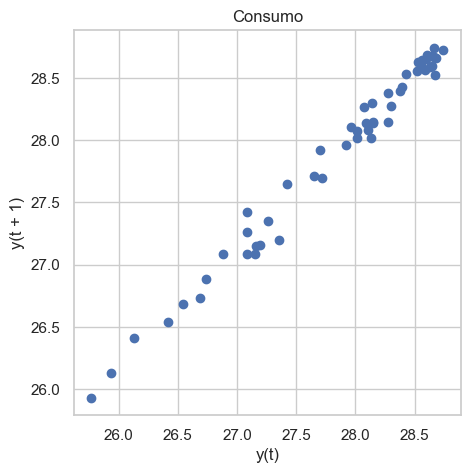

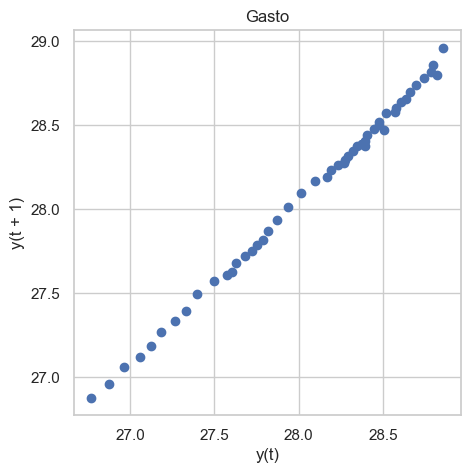

In [66]:

for i in dt.columns:
    plt.figure(figsize=(5,5))
    lag_plot(dt[i])
    plt.title(i)
    plt.show()

In [71]:
model = VAR(dt)
result = model.fit(4)
result.summary()

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Dec, 2023
Time:                     19:41:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.9620
Nobs:                     49.0000    HQIC:                  -19.8965
Log likelihood:           331.877    FPE:                1.34245e-09
AIC:                     -20.4678    Det(Omega_mle):     6.62689e-10
--------------------------------------------------------------------
Results for equation PIB
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.114244         3.242384           -0.035           0.972
L1.PIB             4.537398         1.473307            3.080           0.002
L1.Consumo        -3.455396         1.515315           -2.280           0.

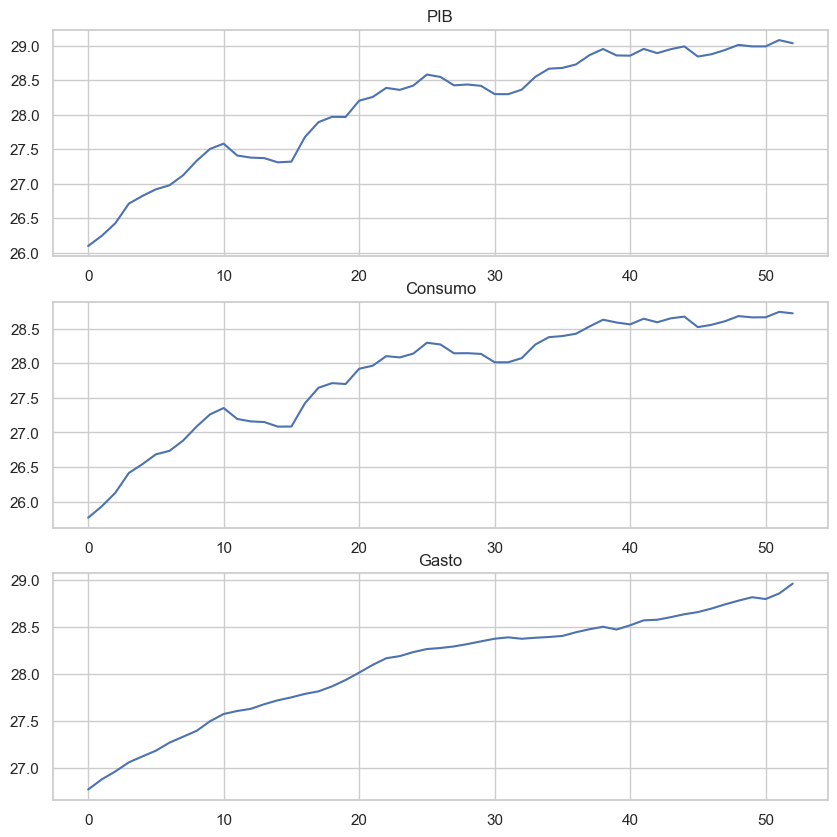

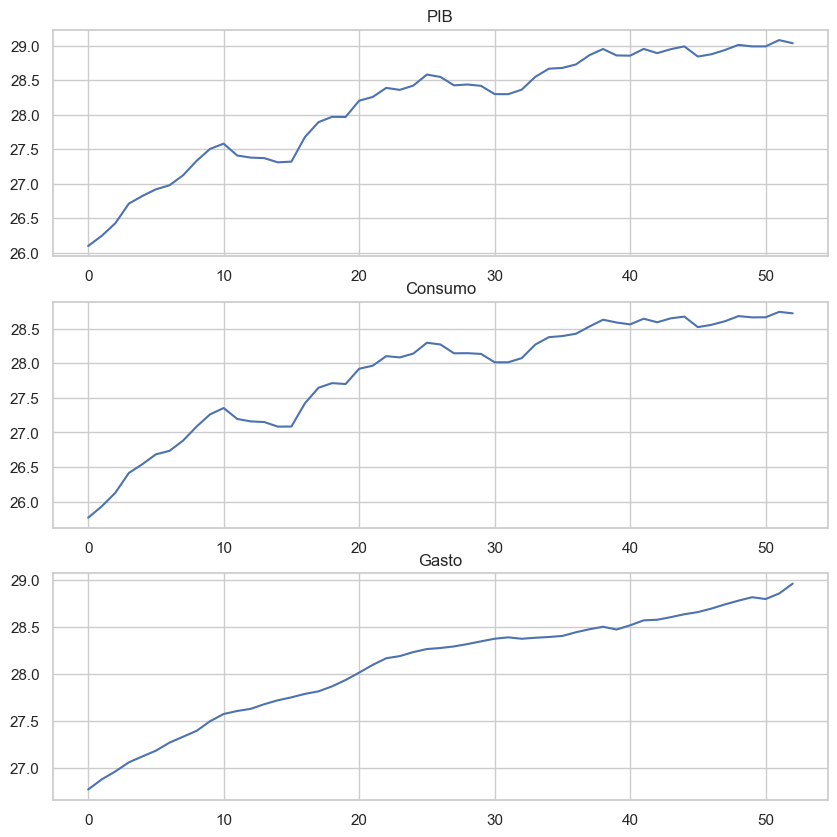

In [72]:
result.plot()

In [69]:
model.select_order(8)

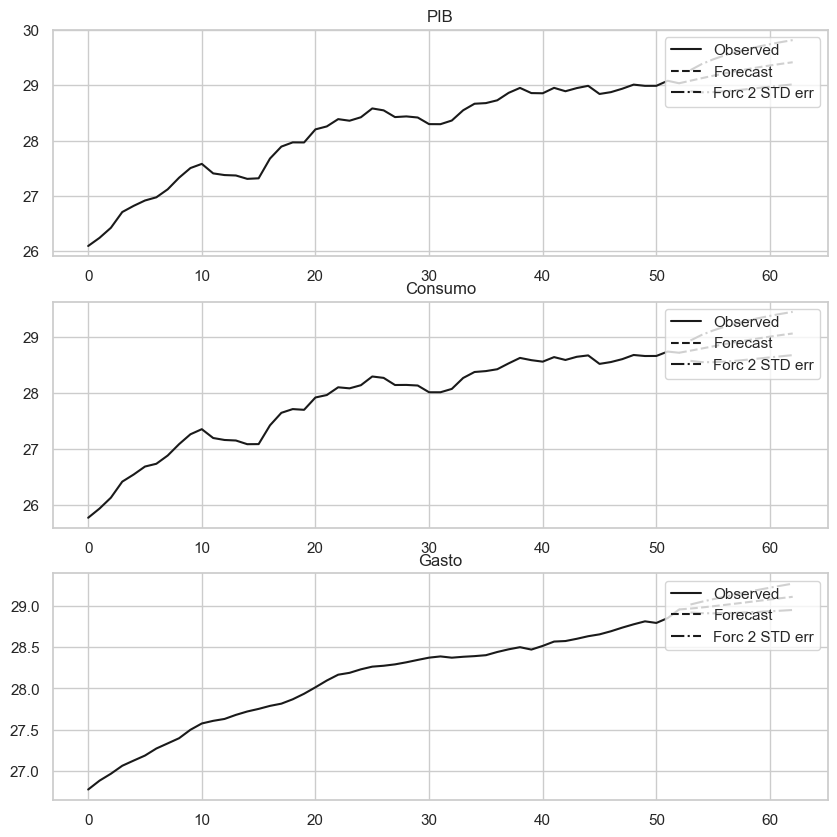

In [82]:
results2 = model.fit(maxlags=8, ic = 'aic')
lag_order = results2.k_ar

fig = results2.plot_forecast(10)
plt.show()

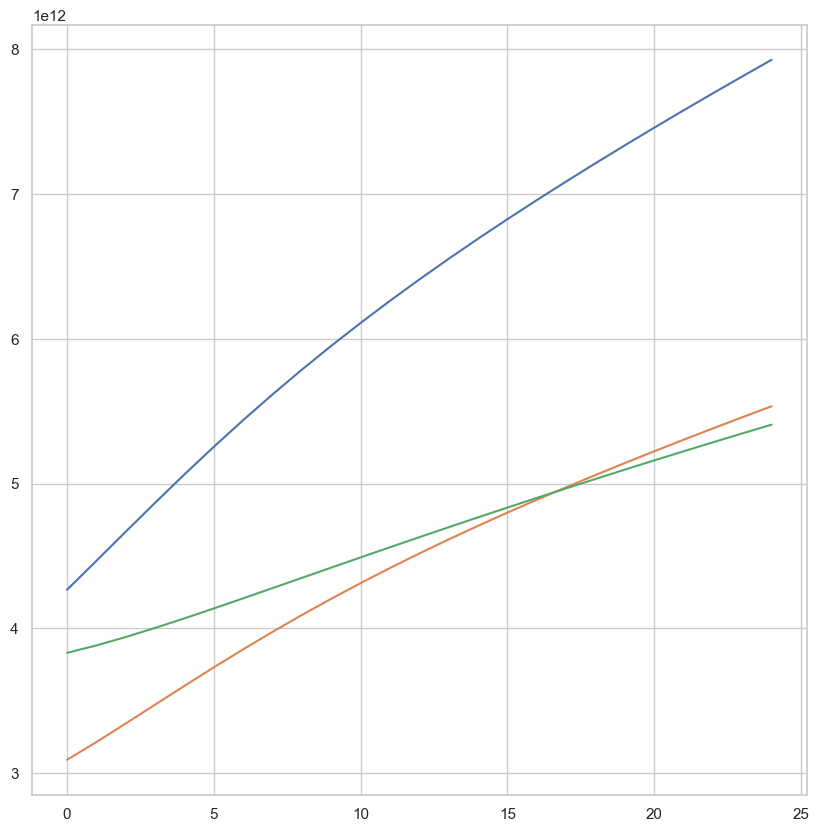

In [90]:
plt.plot(np.exp(results2.forecast(dt.values[-lag_order:],25)))